In [1]:
import numpy as np
import dcTMD
from dcTMD.storing import WorkSet
from dcTMD.dcTMD import WorkEstimator
import dcTMD

In [2]:
# define variables
velocity = 0.001
res = 10
verbose = True
temperature = 290


load pullf files either with a file that contains the names of the pullf files and np.loadtxt() or the function dcTMD.io.load_pullf() which takes either a glob pattern or a file containing the pullf file names as argument.   

In [3]:
pullf_files = '../../tests/testdata/pullf_filenames.dat'
pullf_files = '../../tests/testdata/*pullf.xvg'
filenames = dcTMD.io.load_pullf(pullf_files)

filenames


file ../../tests/testdata/*pullf.xvg not found. using glob.glob(../../tests/testdata/*pullf.xvg)


['../../tests/testdata/t_middle_32_pullf.xvg',
 '../../tests/testdata/t_middle_03_pullf.xvg',
 '../../tests/testdata/t_middle_34_pullf.xvg',
 '../../tests/testdata/t_middle_24_pullf.xvg',
 '../../tests/testdata/t_middle_21_pullf.xvg',
 '../../tests/testdata/t_middle_04_pullf.xvg',
 '../../tests/testdata/t_middle_29_pullf.xvg',
 '../../tests/testdata/t_middle_16_pullf.xvg',
 '../../tests/testdata/t_middle_30_pullf.xvg',
 '../../tests/testdata/t_middle_19_pullf.xvg',
 '../../tests/testdata/t_middle_01_pullf.xvg',
 '../../tests/testdata/t_middle_28_pullf.xvg',
 '../../tests/testdata/t_middle_26_pullf.xvg',
 '../../tests/testdata/t_middle_31_pullf.xvg',
 '../../tests/testdata/t_middle_09_pullf.xvg',
 '../../tests/testdata/t_middle_17_pullf.xvg',
 '../../tests/testdata/t_middle_25_pullf.xvg',
 '../../tests/testdata/t_middle_05_pullf.xvg']

In [12]:
# create WorkSet instance
workset = WorkSet(velocity=velocity,
                  resolution=res,
                  verbose=False,
                  )
workset


WorkSet(resolution=10, velocity=0.001)

In [14]:
# it/fill workset
workset.fit(filenames)
# save workset
#dcTMD.storing.save('my_workset', workset)
print(vars(workset))



Loading & integrating force files: 100%|██████████| 18/18 [00:00<00:00, 52.69it/s]

{'velocity': 0.001, 'resolution': 10, 'verbose': False, 'X': ['../../tests/testdata/t_middle_32_pullf.xvg', '../../tests/testdata/t_middle_03_pullf.xvg', '../../tests/testdata/t_middle_34_pullf.xvg', '../../tests/testdata/t_middle_24_pullf.xvg', '../../tests/testdata/t_middle_21_pullf.xvg', '../../tests/testdata/t_middle_04_pullf.xvg', '../../tests/testdata/t_middle_29_pullf.xvg', '../../tests/testdata/t_middle_16_pullf.xvg', '../../tests/testdata/t_middle_30_pullf.xvg', '../../tests/testdata/t_middle_19_pullf.xvg', '../../tests/testdata/t_middle_01_pullf.xvg', '../../tests/testdata/t_middle_28_pullf.xvg', '../../tests/testdata/t_middle_26_pullf.xvg', '../../tests/testdata/t_middle_31_pullf.xvg', '../../tests/testdata/t_middle_09_pullf.xvg', '../../tests/testdata/t_middle_17_pullf.xvg', '../../tests/testdata/t_middle_25_pullf.xvg', '../../tests/testdata/t_middle_05_pullf.xvg'], 'time_': array([0.0000e+00, 1.0000e-01, 2.0000e-01, ..., 1.9998e+03, 1.9999e+03,
       2.0000e+03]), 'work_'

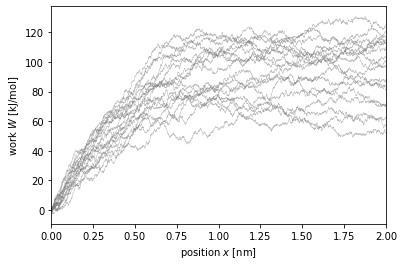

In [64]:
# plot workset
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x = workset.position_
for w in workset.work_:
        ax.plot(x, w, color='#777', alpha=.5, lw=.5)
        
ax.set(xlabel=r'position $x$ [nm]',
       ylabel=r'work $W$ [kJ/mol]',
       xlim=[min(x), max(x)],
)
plt.show()


shapiro wilkins results at x=0.5 is ShapiroResult(statistic=0.9809889793395996, pvalue=0.9596364498138428)
Kolmogorov-Smirnov results at x=0.5 is KstestResult(statistic=1.0, pvalue=0.0)
shapiro wilkins results at x=1.0 is ShapiroResult(statistic=0.9290887713432312, pvalue=0.18714971840381622)
Kolmogorov-Smirnov results at x=1.0 is KstestResult(statistic=1.0, pvalue=0.0)
shapiro wilkins results at x=1.5 is ShapiroResult(statistic=0.9350144863128662, pvalue=0.23768189549446106)
Kolmogorov-Smirnov results at x=1.5 is KstestResult(statistic=1.0, pvalue=0.0)


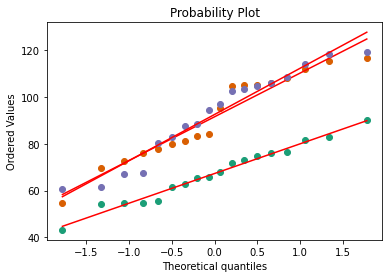

In [79]:
# check if work distribution follows a normal distribution
import math
import numpy as np
from scipy.stats import kstest, shapiro, probplot, norm
from matplotlib import cm

index = [500, 1000, 1500]

# do a probplot
fig, ax = plt.subplots()
cm_subsectionJ = np.linspace(0, 1, 7)
lcolor = [cm.Dark2(x) for x in cm_subsectionJ]
for i, p in enumerate(index):
    res = probplot(workset.work_[:,p], plot=ax, fit=True)
    ax.get_lines()[i*2].set_color(lcolor[i])
    # Shapiro-Wilk Test
    shapiro_test = shapiro(workset.work_[:,p])
    print(f'shapiro wilkins results at x={x[p]} is {shapiro_test}')
    # Kolmogorov-Smirnov Test
    kstest_test = kstest(workset.work_[:,p], 'norm')
    
    print(f'Kolmogorov-Smirnov results at x={x[p]} is {kstest_test}')

500
1000
1500


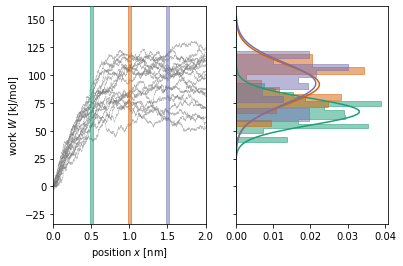

In [92]:
# add vertical lines and distribution
bins = 20
fig, axs = plt.subplots(ncols=2, nrows=1, sharey=True)

for w in workset.work_:
        axs[0].plot(x, w, color='#777', alpha=.5, lw=.5)
        
axs[0].set(xlabel=r'position $x$ [nm]',
       ylabel=r'work $W$ [kJ/mol]',
       xlim=[min(x), max(x)],
)
ymin, ymax = [np.min(workset.work_), np.max(workset.work_)]

for j, idx in enumerate(index):
    print(idx)
    dist = workset.work_[:, idx-bins: idx+bins].flatten()
    x_dist = np.linspace(0, len(dist)-1, len(dist))
    #axs[1].step(x_dist, dist, where='mid', color=lcolor[j])
    axs[1].hist(dist, bins='auto',
                density=True,
                histtype='stepfilled',
                align='mid',
                alpha=0.5,
                orientation='horizontal',
                color=lcolor[j],
                label=r'$s={}$'.format(idx),
                ec=lcolor[j],
                )
    mu, std = norm.fit(dist)
    # Plot the PDF.
    ymin, ymax = plt.ylim()
    y = np.linspace(ymin, ymax, 100)
    p = norm.pdf(y, mu, std)
    axs[1].plot(p, y, color=lcolor[j])

    #title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    axs[0].axvspan(x[idx-bins],
                   x[idx+bins],
                   color=lcolor[j],
                   alpha=0.5,
                   zorder=3)

In [39]:
# plot work distribution
len(x)

2001

In [17]:
# create WorkEstimator instance
workestimator = WorkEstimator(temperature)
# fit existing workset
# or load an existing workset
# workset = dcTMD.storing.load(my_workset)
workestimator.fit(workset)
vars(workestimator)

# smooth friction
from dcTMD.utils.smoothing import gaussfilter_friction
smooth_friction_ = gaussfilter_friction(workestimator.friction_,
                                        x,
                                        0.1,
                                        )

{'temperature': 290,
 'verbose': False,
 'work_set': WorkSet(resolution=10, velocity=0.001),
 'W_mean_': array([ 0.        ,  0.14466391,  0.36114316, ..., 93.12437156,
        93.16217564, 93.25164019]),
 'W_diss_': array([0.00000000e+00, 2.10598947e-02, 6.23645266e-02, ...,
        1.05549583e+02, 1.06622342e+02, 1.06653346e+02]),
 'dG_': array([  0.        ,   0.12360401,   0.29877864, ..., -12.42521181,
        -13.46016651, -13.4017057 ]),
 'friction_': array([      0.        ,   21059.89470551,   41304.63188297, ...,
        1487057.3383258 , 1072758.78472151,   31003.73802612])}

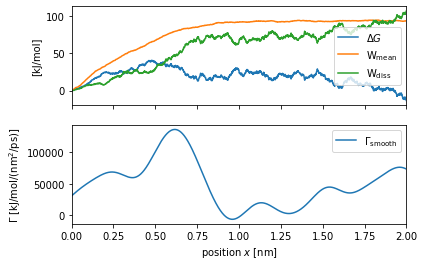

In [38]:
fig, axs = plt.subplots(ncols=1, nrows=2, sharex=True)
x = workset.position_
ax = axs[0]
ax.plot(x, workestimator.dG_, label=r'$\Delta G$')
ax.plot(x, workestimator.W_mean_, label=r'W$_{\mathrm{mean}}$')
ax.plot(x, workestimator.W_diss_, label=r'W$_{\mathrm{diss}}$')

ax.set(ylabel=r'[kJ/mol]',
       xlim=[min(x), max(x)],
)
ax.legend()
ax = axs[1]
#ax.plot(x, workestimator.friction_, label=r"$\Gamma$")
ax.plot(x, smooth_friction_, label=r"$\Gamma_{\mathrm{smooth}}$")

ax.set(xlabel=r'position $x$ [nm]',
       ylabel=r'$\Gamma$ [kJ/mol/(nm$^2$/ps)]',
       xlim=[min(x), max(x)],
)
ax.legend()
plt.show()